In [28]:
from functools import reduce
import operator
import math

from cospar import reader, F, colour

from everest.window import Canvas, DataChannel

%matplotlib inline

In [2]:
conds = (
    F('inputs/aspect') == 1,
    F('inputs/f') == 1,
    F('inputs/tauRef') <= 1e6,
    F('inputs/tauRef') >= 1e5,
    F('inputs/temperatureField') == '_built_peaskauslu-thoesfthuec',
    )
cut = reader[reduce(operator.__and__, conds)]
# datas = reader[cut : ('tauRef', 't', 'Nu')]
# datas = {k : v for k, v in datas.items() if len(v[1])}

In [3]:
datas = sorted(reader[cut : ('inputs/tauRef', 'outputs/t', 'outputs/Nu')].values())

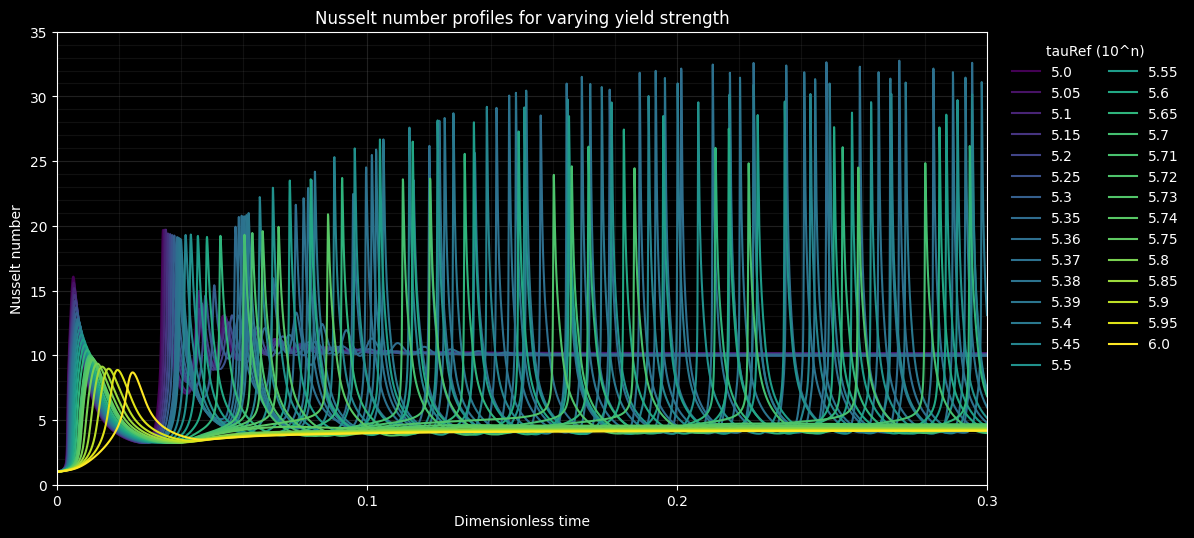

In [32]:
canvas = Canvas(size = (12, 6), colour = 'white', fill = 'black')

ax = canvas.make_ax()
for tau, t, Nu in datas:
    ax.line(t, Nu, c = colour(math.log10(tau), 5, 6))

ax.props.edges.x.lims = (0., 0.3)
ax.props.edges.x.label.text = 'Dimensionless time'
ax.props.edges.y.label.text = 'Nusselt number'
ax.props.title.text = 'Nusselt number profiles for varying yield strength'
ax.props.legend.set_handles_labels(
    [h for h, *_ in ax.collections],
    [str(round(math.log10(tau), 2)) for tau, *_ in datas],
    )
ax.props.legend.title.text = 'tauRef (10^n)'
ax.props.legend.kwargs.update(
    loc = 'upper right',
    ncol = 2,
    frameon = True,
    bbox_to_anchor = (1.22, 1),
    )

canvas.show()